In [7]:
import numpy as np
import matplotlib.pyplot as plt

from compression import calculateCompRatio, compress_dataset
from utils.personal_utils import load_dataset, compute_avg_rmse_of_dataset

import os
import pywt
import matplotlib.pyplot as plt


In [13]:
pywt.wavelist(kind='discrete')


['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [8]:
all_datasets = [
                "/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts", 
                "/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts",


                ]

""" all_datasets = ["/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts",
                
                "/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts",,] """

' all_datasets = ["/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts",\n                \n                "/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts",\n                "/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts",,] '

66it [00:01, 41.28it/s] 
100%|██████████| 42/42 [00:00<00:00, 366.84it/s]
5072it [00:16, 303.35it/s]
100%|██████████| 5048/5048 [00:07<00:00, 649.74it/s]
1351it [00:02, 529.54it/s]
100%|██████████| 1328/1328 [00:01<00:00, 1105.37it/s]
216it [00:00, 8892.69it/s]
100%|██████████| 202/202 [00:00<00:00, 1242.95it/s]
74it [00:00, 13234.63it/s]
100%|██████████| 61/61 [00:00<00:00, 1464.41it/s]


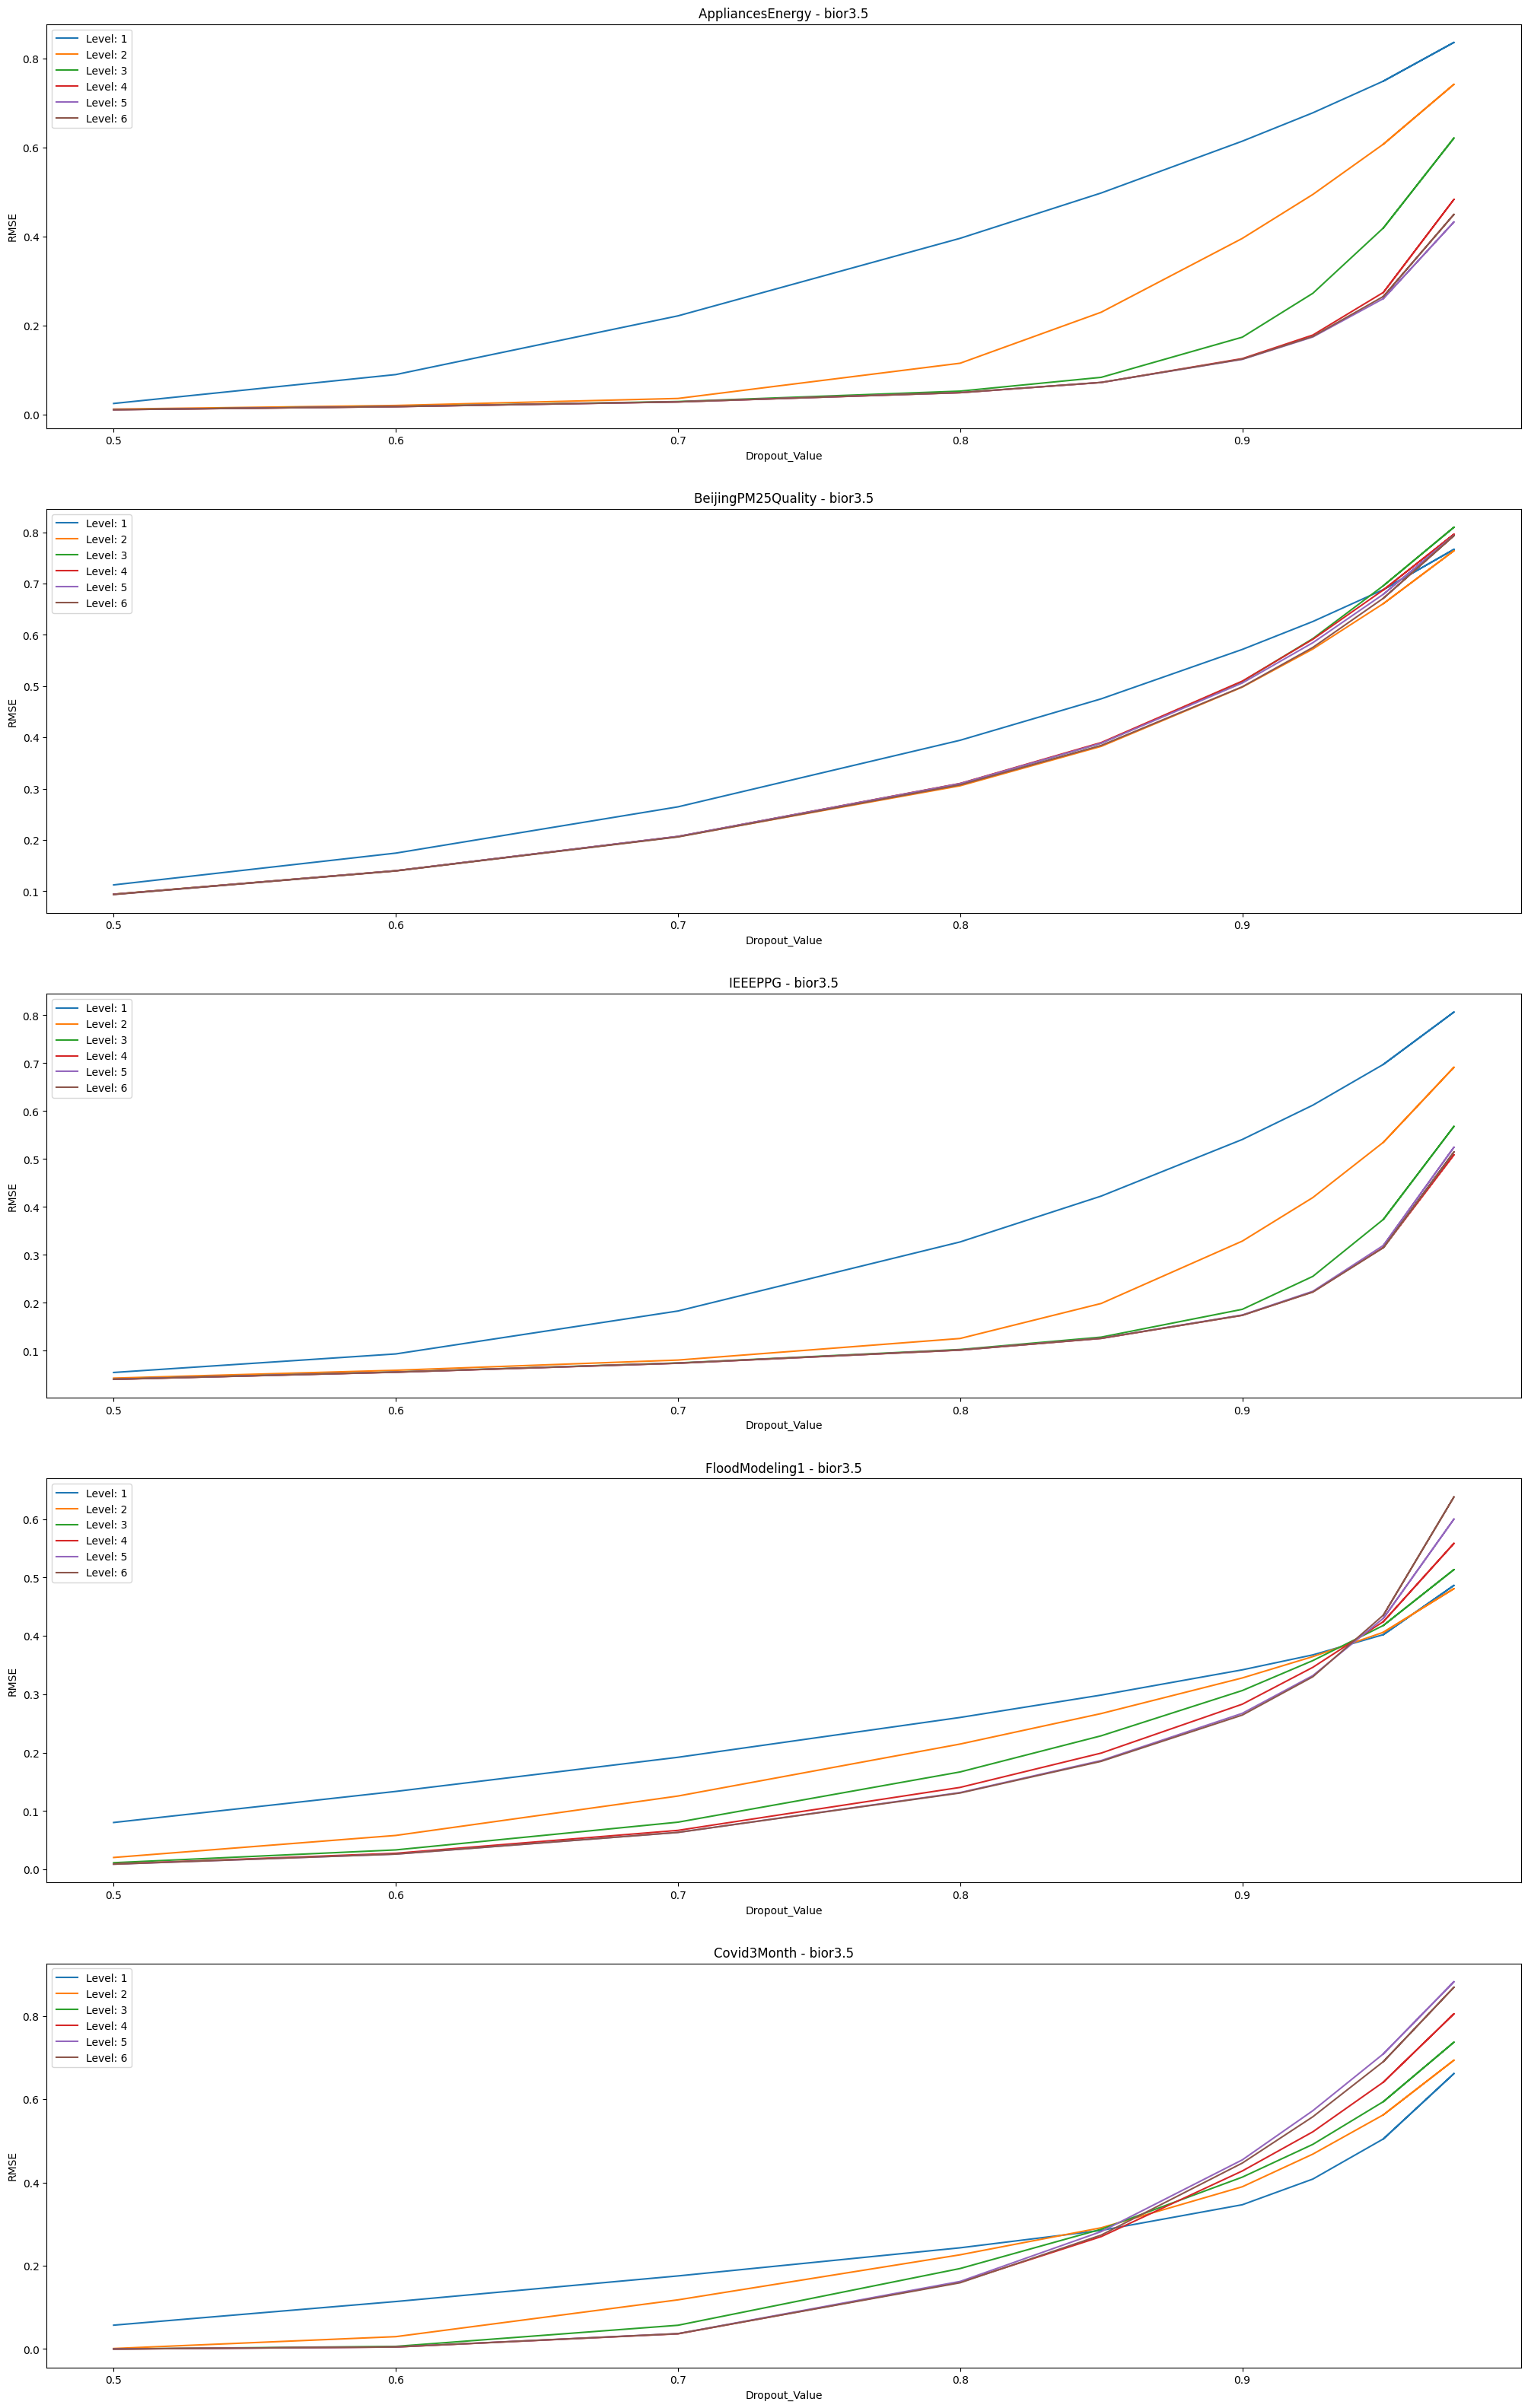

In [15]:
# Plot for each level the rsme!
# Plot for each wavelet the plot for each dataset

# For now do it manually for each wavelet, since loads long!



#wavelet = ["db4", "haar", "mexh"]
wavelet = "bior3.5"


plt.figure(figsize=(25,40))
for subplot_id, dataset_path in enumerate(all_datasets):

   
    dataset_id = os.path.basename(dataset_path).split('_')[0]


    dropout_values = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.925, 0.95, 0.975, 0.98]

    dataset_array = load_dataset(dataset_path)

    plt.subplot(5,1,subplot_id+1)


    # Because all my 5 Datasets have Blocksizes of 1000 and 1008
    max_level = pywt.dwt_max_level(1008, wavelet)

    # max level depends block_size, but should be fine!
    for level in range(1, max_level +1):

        rmses = np.zeros_like(dropout_values)

        for i,step in enumerate(dropout_values):
        
            # Get RMSE
            decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= True, compression_type= "dwt", compression_param= step , wavelet=wavelet, level=level)
            rmses[i]= compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)
            #print(f"Step {i} done")

        
        plt.plot(dropout_values,rmses,label=f"Level: {level}")


    plt.xlabel("Dropout_Value")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id} - {wavelet}")
    plt.legend()
    #plt.grid(color='gray', linestyle='--', linewidth=0.5)









66it [00:01, 43.16it/s] 
100%|██████████| 42/42 [00:00<00:00, 452.32it/s]
5072it [00:16, 303.90it/s]
100%|██████████| 5048/5048 [00:07<00:00, 719.24it/s]
1351it [00:02, 516.38it/s]
100%|██████████| 1328/1328 [00:01<00:00, 917.49it/s]
216it [00:00, 7886.71it/s]
100%|██████████| 202/202 [00:00<00:00, 1801.15it/s]
74it [00:00, 21626.15it/s]
100%|██████████| 61/61 [00:00<00:00, 1860.08it/s]


Text(0.5, 0.98, 'Dropout_Ratio vs RMSE of 3 Wavelets')

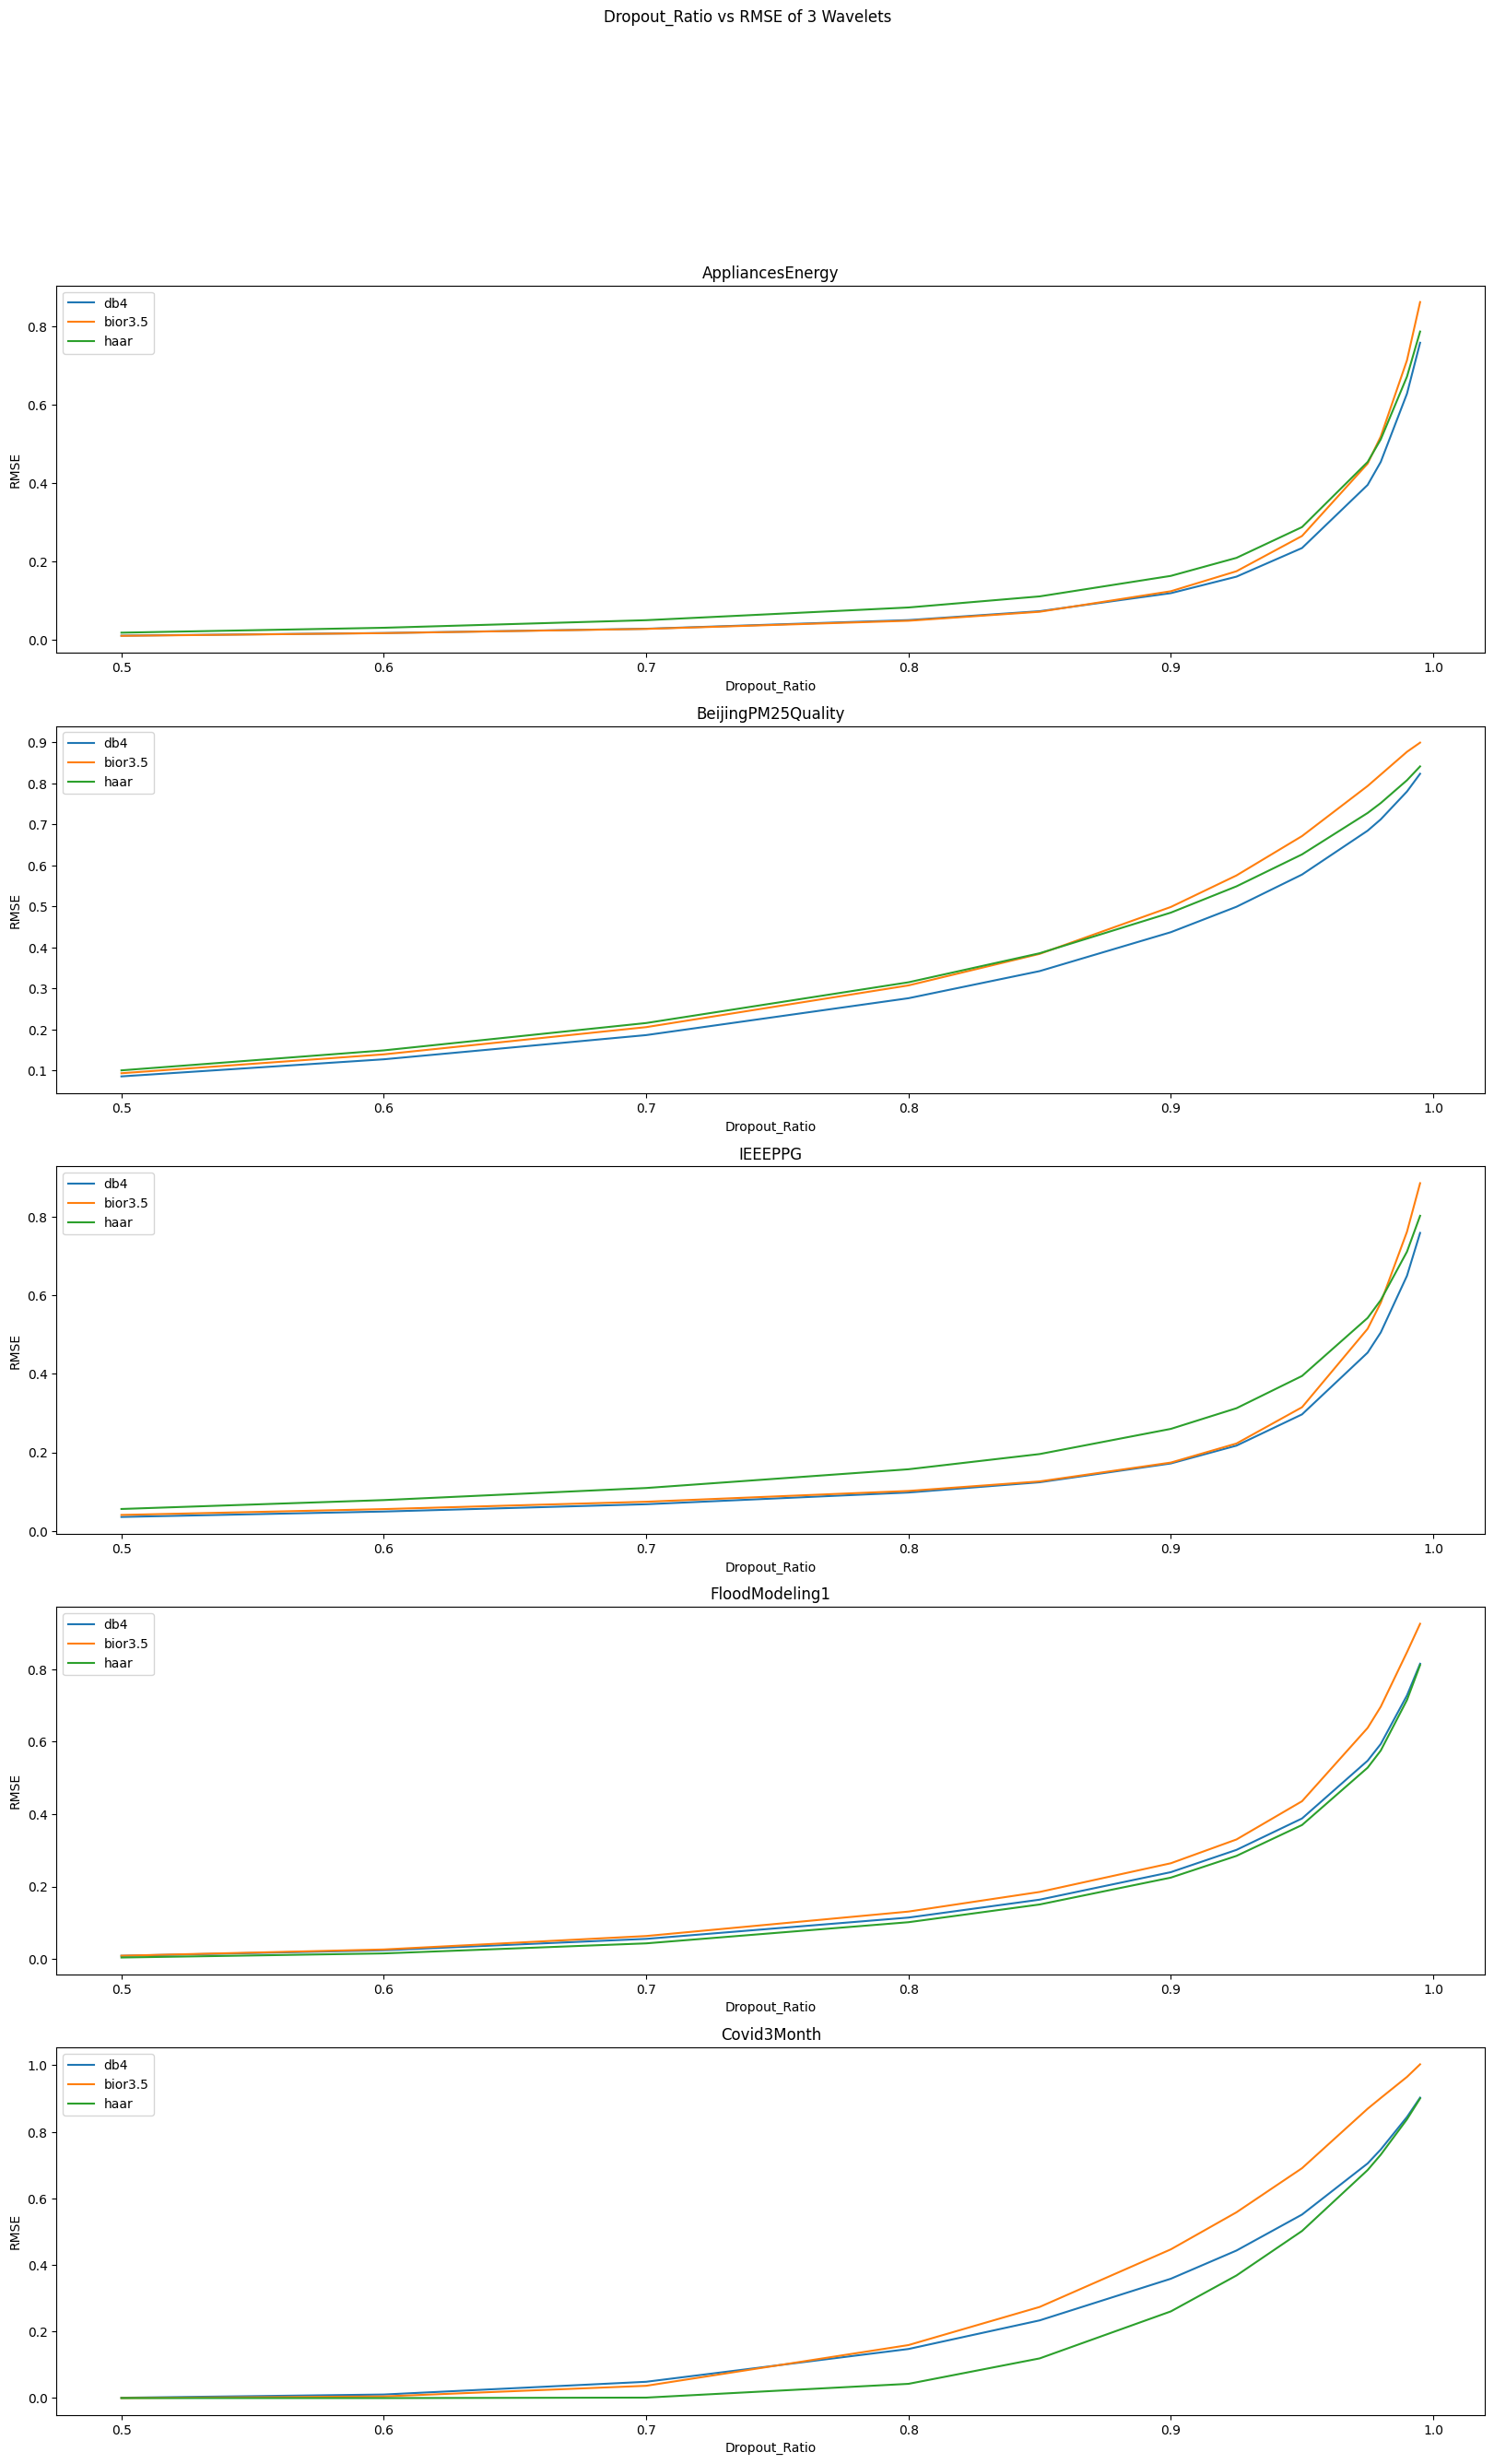

In [23]:
# Find out which wavelet
# Choose for all wavelets the max-level
# For each Dataset all wavelets in one graph


# Plot Dropout-Value vs Compression Ratio and RMSE for each Dataset
# All 3 Techniques in one plot




all_datasets = [
                "/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts", 
                "/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts",


                ]

""" all_datasets = ["/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts",
                
                "/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts",
                "/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts",,] """




plt.figure(figsize=(20,30))
for subplot_id, dataset_path in enumerate(all_datasets):

    # My Params
    wavelet_type =["db4", "bior3.5", "haar"]
    dataset_id = os.path.basename(dataset_path).split('_')[0]

    max_level = pywt.dwt_max_level(1008, wavelet)
    
    # make smaller steps for more accurate plot

    dropout_values  = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.925, 0.95, 0.975, 0.98, 0.99, 0.995]

    dataset_array = load_dataset(dataset_path)

    plt.subplot(5,1,subplot_id+1)

    for wavelet in wavelet_type:

        
        rmses = np.empty_like(dropout_values)


        for i,step in enumerate(dropout_values):
            # Get RMSE
            decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= True, compression_type= "dwt", compression_param=step, wavelet= wavelet, level = level)
            rmses[i]= compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)
           

        
        plt.plot(dropout_values,rmses,label=wavelet)

    plt.xlabel("Dropout_Ratio")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id}")
    plt.legend()
    #plt.grid(color='gray', linestyle='--', linewidth=0.5)


plt.suptitle("Dropout_Ratio vs RMSE of 3 Wavelets")

#-> Go with db4